In [19]:
"""
FX Trading ML Pipeline for EUR/USD (2021–2025)

- Downloads EUR/USD data from Yahoo Finance
- Builds features from past 3 days (OHLC + returns + ranges + HMM regimes)
- Trains multiple ML models on 2021–2024
- Tests on 2025
- Evaluates ML metrics + trading performance
- Builds a soft-voting + stacking ensemble (sklearn models)
- Trains and evaluates an LSTM sequence model (Keras)

"""

'\nFX Trading ML Pipeline for EUR/USD (2021–2025)\n\n- Downloads EUR/USD data from Yahoo Finance\n- Builds features from past 3 days (OHLC + returns + ranges + HMM regimes)\n- Trains multiple ML models on 2021–2024\n- Tests on 2025\n- Evaluates ML metrics + trading performance\n- Builds a soft-voting + stacking ensemble (sklearn models)\n- Trains and evaluates an LSTM sequence model (Keras)\n\n'

In [5]:
!pip -q install yfinance hmmlearn xgboost lightgbm catboost tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 748.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.0/225.0 kB 18.5 MB/s eta 0:00:00


/tmp/ipython-input-1008288164.py:69: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2021-01-01", end="2025-11-30")
[*********************100%***********************]  1 of 1 completed


Train period (tabular): 2021-02-03 to 2024-12-31
Test period  (tabular): 2025-01-02 to 2025-11-28
X_train shape: (1020, 37)
X_test shape:  (235, 37)

=== Model: logit ===
AUC (test):          0.6025
Brier score (test):  0.4235
Precision (test):    0.2511
Recall (test):       0.9828
Trades taken:        200
Hit rate:            0.26
Mean return/trade:   0.001199885108033978
Sharpe (daily):      7.8223503105634355
Total return:        0.27042824884059

=== Model: naive_bayes ===
AUC (test):          0.7308
Brier score (test):  0.2847
Precision (test):    0.4189
Recall (test):       0.5345
Trades taken:        71
Hit rate:            0.4225352112676056
Mean return/trade:   0.002012676056338028
Sharpe (daily):      5.865316241019913
Total return:        0.1532001503628735

=== Model: random_forest ===


/tmp/ipython-input-1008288164.py:384: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  daily_returns[i] = r - tx_cost
/tmp/ipython-input-1008288164.py:384: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  daily_returns[i] = r - tx_cost
/tmp/ipython-input-1008288164.py:384: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  daily_returns[i] = r - tx_cost


AUC (test):          0.6307
Brier score (test):  0.2337
Precision (test):    0.3297
Recall (test):       0.5172
Trades taken:        55
Hit rate:            0.36363636363636365
Mean return/trade:   0.001718181818181818
Sharpe (daily):      4.641854195508335
Total return:        0.09884596508928989

=== Model: gradient_boosting ===


/tmp/ipython-input-1008288164.py:384: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  daily_returns[i] = r - tx_cost


AUC (test):          0.5908
Brier score (test):  0.2030
Precision (test):    0.3333
Recall (test):       0.0862
Trades taken:        6
Hit rate:            0.3333333333333333
Mean return/trade:   0.0015666666666666665
Sharpe (daily):      1.4066363972962144
Total return:        0.009420140981401204

=== Model: svm_rbf ===
AUC (test):          0.5583
Brier score (test):  0.1909
Precision (test):    0.0000
Recall (test):       0.0000
Trades taken:        0
Hit rate:            nan
Mean return/trade:   nan
Sharpe (daily):      nan
Total return:        nan

=== Model: hist_gbm ===


/tmp/ipython-input-1008288164.py:384: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  daily_returns[i] = r - tx_cost


AUC (test):          0.6028
Brier score (test):  0.2072
Precision (test):    0.3333
Recall (test):       0.0862
Trades taken:        5
Hit rate:            0.2
Mean return/trade:   0.0009
Sharpe (daily):      0.949893109907178
Total return:        0.004498100289980433

=== Model: xgb ===


/tmp/ipython-input-1008288164.py:384: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  daily_returns[i] = r - tx_cost


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/tmp/ipython-input-1008288164.py:384: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  daily_returns[i] = r - tx_cost


AUC (test):          0.6481
Brier score (test):  0.2421
Precision (test):    0.2222
Recall (test):       0.0345
Trades taken:        7
Hit rate:            0.2857142857142857
Mean return/trade:   0.0013285714285714285
Sharpe (daily):      1.3914102074948982
Total return:        0.009319198967303155

=== Model: cat ===


/tmp/ipython-input-1008288164.py:384: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  daily_returns[i] = r - tx_cost


AUC (test):          0.5409
Brier score (test):  0.2270
Precision (test):    0.3571
Recall (test):       0.1724
Trades taken:        13
Hit rate:            0.3076923076923077
Mean return/trade:   0.0014384615384615386
Sharpe (daily):      1.9862782466887456
Total return:        0.018827128116809977

=== Model: logit_cal ===
AUC (test):          0.6256
Brier score (test):  0.1852
Precision (test):    0.0000
Recall (test):       0.0000
Trades taken:        0
Hit rate:            nan
Mean return/trade:   nan
Sharpe (daily):      nan
Total return:        nan

=== Model: naive_bayes_cal ===
AUC (test):          0.7152
Brier score (test):  0.2211
Precision (test):    0.3976
Recall (test):       0.5690
Trades taken:        0
Hit rate:            nan
Mean return/trade:   nan
Sharpe (daily):      nan
Total return:        nan

=== Model: random_forest_cal ===


/tmp/ipython-input-1008288164.py:384: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  daily_returns[i] = r - tx_cost


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/ut

AUC (test):          0.3944
Brier score (test):  0.2578
Precision (test):    0.2113
Recall (test):       0.7759
Trades taken:        1
Hit rate:            0.0
Mean return/trade:   -0.0001
Sharpe (daily):      -1.03553871271523
Total return:        -9.999999999998899e-05

=== Model: cat_cal ===
AUC (test):          0.4922
Brier score (test):  0.2539
Precision (test):    0.2281
Recall (test):       0.6724
Trades taken:        0
Hit rate:            nan
Mean return/trade:   nan
Sharpe (daily):      nan
Total return:        nan


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



=== Model: ensemble_soft_voting ===
AUC (test):          0.7069
Brier score (test):  0.1785
Precision (test):    0.3333
Recall (test):       0.0345
Trades taken:        1
Hit rate:            1.0
Mean return/trade:   0.0049
Sharpe (daily):      1.0355387127152296
Total return:        0.004899999999999904

=== Model: ensemble_stacking ===


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


AUC (test):          0.5594
Brier score (test):  0.2571
Precision (test):    0.2887
Recall (test):       0.4828
Trades taken:        53
Hit rate:            0.49056603773584906
Mean return/trade:   0.002352830188679245
Sharpe (daily):      5.453180495584159
Total return:        0.132456028719099

=== Model: ensemble_soft_voting_cal ===


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/tmp/ipython-input-1008288164.py:384: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  daily_returns[i] = r - tx_cost
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassi

AUC (test):          0.6906
Brier score (test):  0.1848
Precision (test):    0.0000
Recall (test):       0.0000
Trades taken:        0
Hit rate:            nan
Mean return/trade:   nan
Sharpe (daily):      nan
Total return:        nan

=== Model: ensemble_stacking_cal ===


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warning

AUC (test):          0.6949
Brier score (test):  0.2357
Precision (test):    0.4000
Recall (test):       0.6207
Trades taken:        0
Hit rate:            nan
Mean return/trade:   nan
Sharpe (daily):      nan
Total return:        nan

=== LSTM Sequence Model ===
Epoch 1/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - auc: 0.5591 - loss: 1.1521 - val_auc: 0.6253 - val_loss: 0.6859
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.6839 - loss: 1.0933 - val_auc: 0.6142 - val_loss: 0.6666
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.6778 - loss: 1.1014 - val_auc: 0.6045 - val_loss: 0.6521
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.6920 - loss: 1.0824 - val_auc: 0.6046 - val_loss: 0.6434
Epoch 5/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.7062 - loss: 1.0722 - val_auc: 0.6110 - val_loss: 0.6290
Epoch 6/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.6860 - loss: 1.0776 - val_auc: 0.6192 - val_loss: 0.6271
Epoch 7/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0

/tmp/ipython-input-1008288164.py:384: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  daily_returns[i] = r - tx_cost


,name,auc_test,brier_test,precision,recall,n_trades,hit_rate,mean_ret,sharpe,total_return
0,Logit,0.602474,0.423471,0.251101,0.982759,200,0.260000,0.001200,7.822350,0.270428
1,Naive_bayes,0.730762,0.284705,0.418919,0.534483,71,0.422535,0.002013,5.865316,0.153200
19,Ensemble_stacking,0.559419,0.257137,0.288660,0.482759,53,0.490566,0.002353,5.453180,0.132456
2,Random_forest,0.630723,0.233746,0.329670,0.517241,55,0.363636,0.001718,4.641854,0.098846
22,Lstm_sequence,0.675433,0.217584,0.362637,0.568966,55,0.345455,0.001627,4.499545,0.093379
11,Random_forest_cal,0.700857,0.204343,0.377049,0.396552,30,0.233333,0.001067,2.582525,0.032431
6,Xgb,0.602182,0.216411,0.294118,0.172414,23,0.260870,0.001204,2.410819,0.028013
8,Cat,0.540912,0.227022,0.357143,0.172414,13,0.307692,0.001438,1.986278,0.018827
3,Gradient_boosting,0.590785,0.203031,0.333333,0.086207,6,0.333333,0.001567,1.406636,0.009420
7,Lgbm,0.648062,0.242119,0.222222,0.034483,7,0.285714,0.001329,1.391410,0.009319



Generating performance comparison plots...


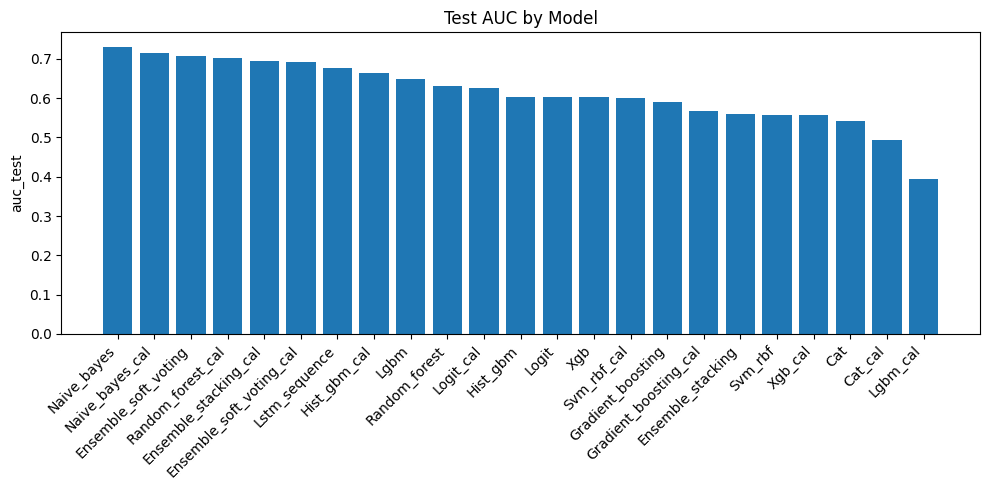

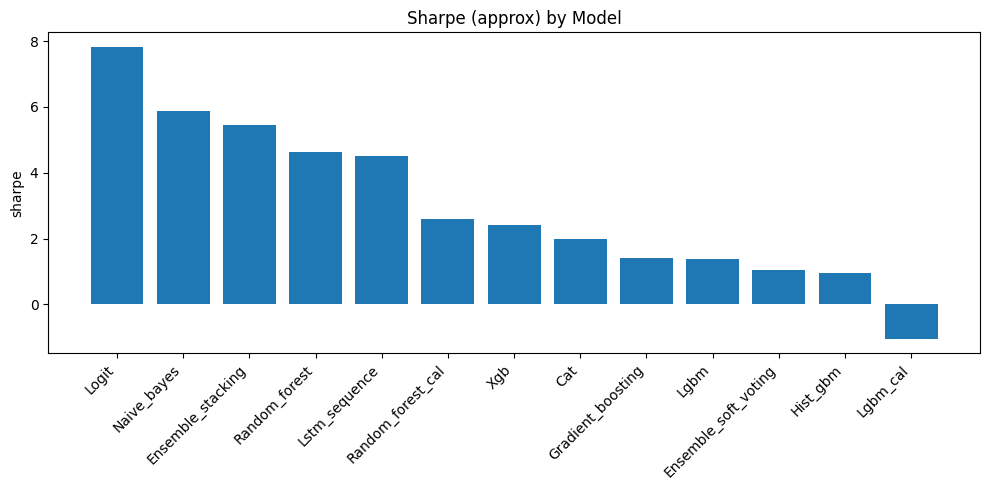

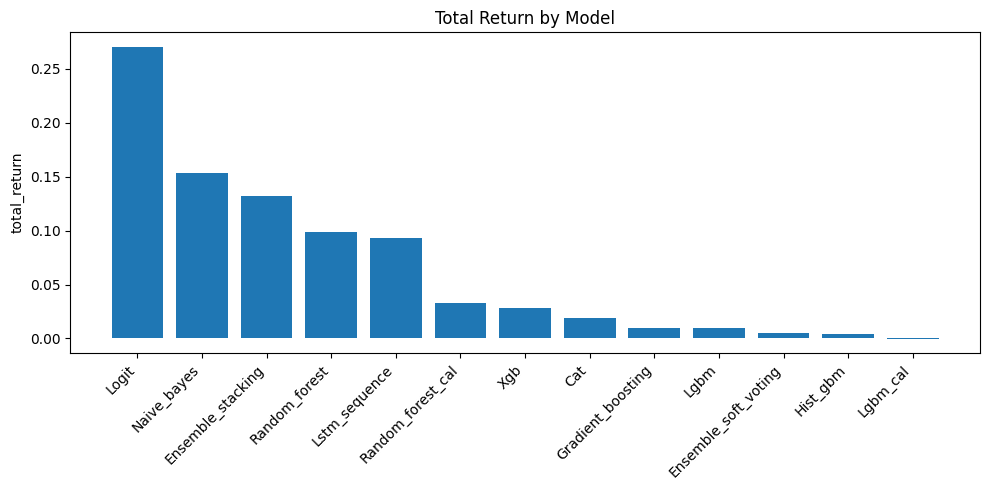

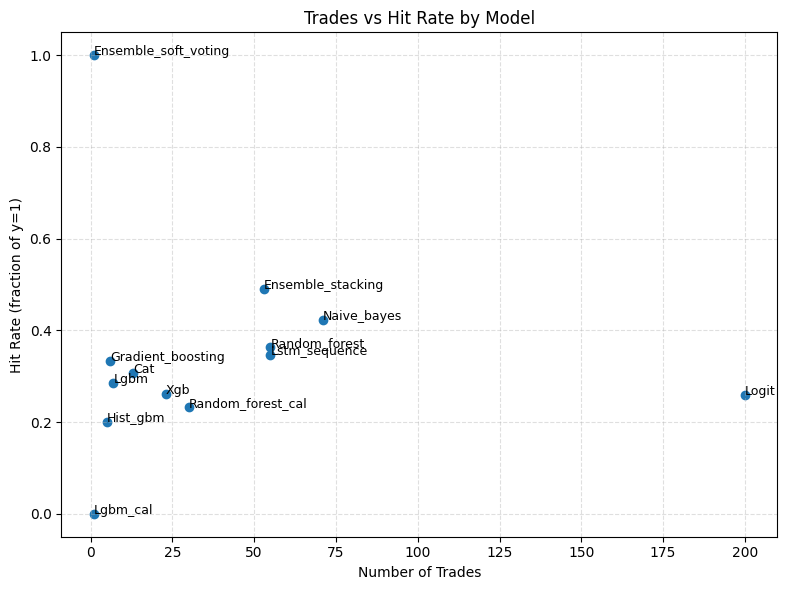

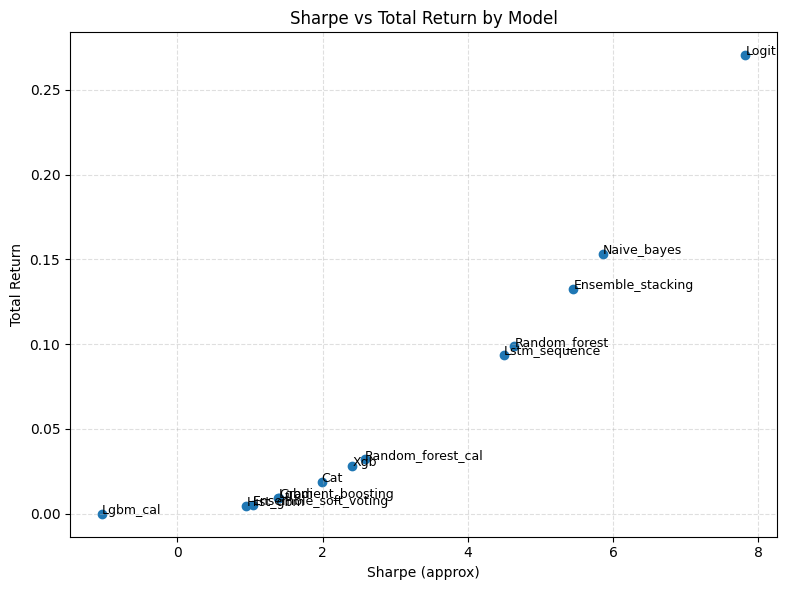

In [7]:
# -*- coding: utf-8 -*-
"""Finance and Structuring Part2

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1DYFKYoseFEkkHYd-9AURuiHVbqHeKgx1

FX Trading ML Pipeline for EUR/USD (2021–2025)

- Downloads EUR/USD data from Yahoo Finance
- Builds features from past 3 days (OHLC + returns + ranges + HMM regimes)
- Trains multiple ML models on 2021–2024
- Tests on 2025
- Evaluates ML metrics + trading performance
- Builds a soft-voting + stacking ensemble (sklearn models)
- Trains and evaluates an LSTM sequence model (Keras)
"""

# Requirements: yfinance, hmmlearn, xgboost, lightgbm, catboost, tensorflow

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

from hmmlearn.hmm import GaussianHMM

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.metrics import roc_auc_score, brier_score_loss, precision_score, recall_score
from sklearn.base import clone
from sklearn.model_selection import TimeSeriesSplit
from sklearn.calibration import CalibratedClassifierCV

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from IPython.display import display

# Global configuration

DELTA = 0.005          # profit-taking level (0.5%)
P_THRESHOLD = 0.60     # trade if prob >= 60%
N_LAGS = 3             # previous n days (start with 3)
HMM_STATES = 3
RANDOM_STATE = 42

TRAIN_END = pd.Timestamp("2024-12-31")
TEST_START = pd.Timestamp("2025-01-01")

SEQ_LEN = 20           # LSTM sequence length
TX_COST = 0.0001       # approx 1 pip cost penalty (simplified)

np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)

# 1. Download data

def download_data():
    ticker = "EURUSD=X"
    df = yf.download(ticker, start="2021-01-01", end="2025-11-30")
    df = df[["Open", "High", "Low", "Close"]].dropna()

    def _col_as_series(frame, col):
        series = frame[col]
        if isinstance(series, pd.DataFrame):
            series = series.iloc[:, 0]
        return pd.Series(series, index=frame.index)

    # Ensure all price columns are plain Series (yfinance can return 1-col DataFrames)
    close = _col_as_series(df, "Close")
    open_ = _col_as_series(df, "Open")
    high = _col_as_series(df, "High")
    low = _col_as_series(df, "Low")

    df["Close"] = close
    df["Open"] = open_
    df["High"] = high
    df["Low"] = low

    # returns
    df["log_ret"] = np.log(close / close.shift(1))
    df["ret_close"] = close.pct_change()
    df["intraday_ret"] = close / open_ - 1.0
    df["range"] = (high - low) / open_

    df.dropna(inplace=True)
    return df

# 2. TECHNICAL INDICATORS (NO LEAKAGE)

def add_technical_indicators(df):
    """
    Adds ~20 indicators using only current/past information (safe for time series).
    Everything uses rolling windows and shifted where necessary in feature creation.
    """

    def _col_as_series(frame, col):
        series = frame[col]
        if isinstance(series, pd.DataFrame):
            series = series.iloc[:, 0]
        return pd.Series(series, index=frame.index)

    close = _col_as_series(df, "Close")
    high = _col_as_series(df, "High")
    low = _col_as_series(df, "Low")
    open_ = _col_as_series(df, "Open")

    # True Range / ATR-like
    prev_close = close.shift(1)
    tr1 = high - low
    tr2 = (high - prev_close).abs()
    tr3 = (low - prev_close).abs()
    df["true_range"] = np.maximum(tr1, np.maximum(tr2, tr3))
    df["atr_14"] = df["true_range"].rolling(14).mean()

    # Rolling volatility of returns
    df["vol_5"] = df["log_ret"].rolling(5).std()
    df["vol_10"] = df["log_ret"].rolling(10).std()
    df["vol_20"] = df["log_ret"].rolling(20).std()

    # Rolling mean returns (trend proxy)
    df["ret_mean_5"] = df["log_ret"].rolling(5).mean()
    df["ret_mean_10"] = df["log_ret"].rolling(10).mean()
    df["ret_mean_20"] = df["log_ret"].rolling(20).mean()

    # EMA features and cross
    df["ema_10"] = close.ewm(span=10, adjust=False).mean()
    df["ema_20"] = close.ewm(span=20, adjust=False).mean()
    df["ema_cross_10_20"] = (df["ema_10"] - df["ema_20"]) / close

    # RSI 14
    delta = df["Close"].diff()
    gain = delta.clip(lower=0).rolling(14).mean()
    loss = (-delta.clip(upper=0)).rolling(14).mean()
    rs = gain / (loss + 1e-12)
    df["rsi_14"] = 100 - (100 / (1 + rs))

    # Rolling range percentile (relative range)
    df["range_20_pctl"] = df["range"].rolling(20).apply(
        lambda x: pd.Series(x).rank(pct=True).iloc[-1],
        raw=False
    )

    # Higher moments of returns
    df["skew_20"] = df["log_ret"].rolling(20).skew()
    df["kurt_20"] = df["log_ret"].rolling(20).kurt()

    # Vol regime indicator (above/below median vol_20 in trailing window)
    med_vol = df["vol_20"].rolling(60).median()
    df["vol_regime"] = (df["vol_20"] > med_vol).astype(int)

    df.dropna(inplace=True)
    return df

# 3. Fit HMM regime model and add regime probability features

def add_hmm_regimes(df):
    train_mask = df.index <= TRAIN_END
    ret_train = df.loc[train_mask, "log_ret"].values.reshape(-1, 1)

    hmm = GaussianHMM(
        n_components=HMM_STATES,
        covariance_type="full",
        n_iter=300,
        random_state=RANDOM_STATE
    )
    hmm.fit(ret_train)

    _, post = hmm.score_samples(df["log_ret"].values.reshape(-1, 1))
    for k in range(HMM_STATES):
        df[f"regime_{k}"] = post[:, k]

    return df, hmm

# 4. Build supervised dataset (LAGGED INPUTS + INDICATORS + REGIMES)

def build_features(df):
    # Target: High_t >= (1+DELTA) * Open_t
    df["target"] = (df["High"] >= (1.0 + DELTA) * df["Open"]).astype(int)

    # Lagged OHLC + basic return/range
    for lag in range(1, N_LAGS + 1):
        df[f"open_lag{lag}"] = df["Open"].shift(lag)
        df[f"high_lag{lag}"] = df["High"].shift(lag)
        df[f"low_lag{lag}"]  = df["Low"].shift(lag)
        df[f"close_lag{lag}"] = df["Close"].shift(lag)

        df[f"ret_close_lag{lag}"] = df["ret_close"].shift(lag)
        df[f"intraday_ret_lag{lag}"] = df["intraday_ret"].shift(lag)
        df[f"range_lag{lag}"] = df["range"].shift(lag)

    # Lagged regimes (yesterday)
    for k in range(HMM_STATES):
        df[f"regime_{k}_lag1"] = df[f"regime_{k}"].shift(1)

    # Lagged technical indicators (yesterday) to avoid any same-day mixing
    tech_cols = [
        "atr_14","vol_5","vol_10","vol_20",
        "ret_mean_5","ret_mean_10","ret_mean_20",
        "ema_cross_10_20","rsi_14","range_20_pctl",
        "skew_20","kurt_20","vol_regime"
    ]
    for c in tech_cols:
        df[c + "_lag1"] = df[c].shift(1)

    # Feature columns
    feature_cols = []
    for lag in range(1, N_LAGS + 1):
        feature_cols += [
            f"open_lag{lag}", f"high_lag{lag}", f"low_lag{lag}", f"close_lag{lag}",
            f"ret_close_lag{lag}", f"intraday_ret_lag{lag}", f"range_lag{lag}"
        ]
    for k in range(HMM_STATES):
        feature_cols.append(f"regime_{k}_lag1")

    feature_cols += [c + "_lag1" for c in tech_cols]

    data = df[feature_cols + ["target"]].dropna()
    X = data[feature_cols].values
    y = data["target"].values
    idx = data.index
    return X, y, idx, feature_cols


def time_split(X, y, idx):
    train_mask = idx <= TRAIN_END
    test_mask = idx >= TEST_START
    return X[train_mask], y[train_mask], idx[train_mask], X[test_mask], y[test_mask], idx[test_mask]

# 5. IMBALANCE HELPERS (TRAIN ONLY, NO LEAKAGE)

def compute_imbalance_params(y_train):
    y_train = np.asarray(y_train)
    pos = int((y_train == 1).sum())
    neg = int((y_train == 0).sum())
    spw = neg / max(pos, 1)  # scale_pos_weight for boosting libs
    return pos, neg, float(spw)


def make_sample_weight(y_train):
    pos, neg, spw = compute_imbalance_params(y_train)
    y_train = np.asarray(y_train)
    return np.where(y_train == 1, spw, 1.0).astype(float)

# 6. MODELS

def build_models(scale_pos_weight=1.0):
    models = {}

    # --- OLD MODELS (kept) ---
    models["logit"] = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=2000, class_weight="balanced", random_state=RANDOM_STATE)),
    ])

    models["naive_bayes"] = GaussianNB()

    # improved RF: more trees + balanced_subsample
    models["random_forest"] = RandomForestClassifier(
        n_estimators=800,
        max_depth=8,
        min_samples_leaf=10,
        random_state=RANDOM_STATE,
        n_jobs=-1,
        class_weight="balanced_subsample"
    )

    # keep old sklearn GBM
    models["gradient_boosting"] = GradientBoostingClassifier(
        n_estimators=900,
        learning_rate=0.03,
        max_depth=3,
        random_state=RANDOM_STATE
    )

    models["svm_rbf"] = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC(kernel="rbf", C=2.0, gamma="scale", probability=True,
                    class_weight="balanced", random_state=RANDOM_STATE)),
    ])

    # --- STRONGER TABULAR LEARNERS (added) ---
    models["hist_gbm"] = HistGradientBoostingClassifier(
        max_depth=3,
        learning_rate=0.03,
        max_iter=1500,
        random_state=RANDOM_STATE
    )

    # Best-in-class libs (Colab-friendly)
    from xgboost import XGBClassifier
    from lightgbm import LGBMClassifier
    from catboost import CatBoostClassifier

    models["xgb"] = XGBClassifier(
        n_estimators=2500,
        learning_rate=0.02,
        max_depth=3,
        subsample=0.9,
        colsample_bytree=0.9,
        reg_lambda=1.0,
        min_child_weight=5,
        objective="binary:logistic",
        eval_metric="logloss",
        random_state=RANDOM_STATE,
        n_jobs=-1,
        scale_pos_weight=scale_pos_weight
    )

    models["lgbm"] = LGBMClassifier(
        n_estimators=9000,
        learning_rate=0.01,
        num_leaves=31,
        subsample=0.9,
        colsample_bytree=0.9,
        reg_lambda=1.0,
        random_state=RANDOM_STATE,
        n_jobs=-1,
        scale_pos_weight=scale_pos_weight
    )

    models["cat"] = CatBoostClassifier(
        depth=4,
        learning_rate=0.03,
        iterations=4500,
        loss_function="Logloss",
        random_seed=RANDOM_STATE,
        verbose=False,
        class_weights=[1.0, float(scale_pos_weight)]
    )

    # --- CALIBRATION FOR EVERY MODEL (added) ---
    tscv = TimeSeriesSplit(n_splits=5)
    for name, mdl in list(models.items()):
        models[name + "_cal"] = CalibratedClassifierCV(
            estimator=mdl,
            method="sigmoid",  # safer than isotonic on limited data
            cv=tscv
        )

    return models

# 7. REALISTIC TRADING EVAL (DAILY EQUITY CURVE SHARPE, COSTS, NON-TRADE DAYS)

def evaluate_trading(proba, y_true, df_meta_test, p_threshold=P_THRESHOLD, delta=DELTA, tx_cost=TX_COST):
    """
    Correct Sharpe:
      - builds DAILY returns series (0 on non-trade days)
      - subtracts transaction costs on trade days
      - annualizes via sqrt(252)
    """
    proba = np.asarray(proba)
    y_true = np.asarray(y_true)

    n_days = len(y_true)
    daily_returns = np.zeros(n_days, dtype=float)

    trade_mask = proba >= p_threshold
    trade_idx = np.where(trade_mask)[0]
    n_trades = int(trade_mask.sum())

    if n_trades == 0:
        return {"n_trades": 0, "hit_rate": np.nan, "mean_ret": np.nan, "sharpe": np.nan, "total_return": np.nan}

    opens = df_meta_test["Open"].values
    closes = df_meta_test["Close"].values

    # trade return definition (same as your original logic)
    # if hit target -> +delta else Open->Close
    for i in trade_idx:
        if y_true[i] == 1:
            r = delta
        else:
            r = closes[i] / opens[i] - 1.0
        daily_returns[i] = r - tx_cost

    mean_daily = daily_returns.mean()
    std_daily = daily_returns.std(ddof=1)
    sharpe = (np.sqrt(252) * mean_daily / std_daily) if std_daily > 0 else np.nan

    total_return = np.prod(1.0 + daily_returns) - 1.0
    hit_rate = float(y_true[trade_mask].mean())
    mean_trade_ret = float(daily_returns[trade_mask].mean())

    return {
        "n_trades": n_trades,
        "hit_rate": hit_rate,
        "mean_ret": mean_trade_ret,
        "sharpe": sharpe,
        "total_return": total_return
    }

# 8. MODEL EVALUATION


def fit_with_weights(model, X_train, y_train, sample_weight):
    """
    Tries to fit model with sample_weight
    Supports:
      - pipelines with clf__sample_weight
      - estimators with sample_weight
      - falls back to plain fit
    """
    # pipeline case
    try:
        model.fit(X_train, y_train, **{"clf__sample_weight": sample_weight})
        return
    except Exception:
        pass

    # estimator case
    try:
        model.fit(X_train, y_train, sample_weight=sample_weight)
        return
    except Exception:
        pass

    # fallback
    model.fit(X_train, y_train)


def evaluate_model(name, model, X_train, y_train, X_test, y_test, df_meta_test, use_sample_weight=True):
    print(f"\n=== Model: {name} ===")

    sw = make_sample_weight(y_train) if use_sample_weight else None
    if sw is not None:
        fit_with_weights(model, X_train, y_train, sw)
    else:
        model.fit(X_train, y_train)

    proba_test = model.predict_proba(X_test)[:, 1]

    try:
        auc_test = roc_auc_score(y_test, proba_test)
    except ValueError:
        auc_test = np.nan

    brier_test = brier_score_loss(y_test, proba_test)
    pred_test = (proba_test >= 0.5).astype(int)

    precision = precision_score(y_test, pred_test, zero_division=0)
    recall = recall_score(y_test, pred_test, zero_division=0)

    trading_stats = evaluate_trading(proba_test, y_test, df_meta_test)

    print(f"AUC (test):          {auc_test:.4f}" if not np.isnan(auc_test) else "AUC (test):          n/a")
    print(f"Brier score (test):  {brier_test:.4f}")
    print(f"Precision (test):    {precision:.4f}")
    print(f"Recall (test):       {recall:.4f}")
    print(f"Trades taken:        {trading_stats['n_trades']}")
    print(f"Hit rate:            {trading_stats['hit_rate']}" )
    print(f"Mean return/trade:   {trading_stats['mean_ret']}")
    print(f"Sharpe (daily):      {trading_stats['sharpe']}")
    print(f"Total return:        {trading_stats['total_return']}")

    return {
        "name": name,
        "auc_test": auc_test,
        "brier_test": brier_test,
        "precision": precision,
        "recall": recall,
        **trading_stats,
        "proba_test": proba_test  # keep for diagnostics
    }

# 9. Build ensembles (soft voting + stacking)


def build_ensembles(models, X_train, y_train):
    # keep your original-style ensembles on original models
    base_names = ["logit","naive_bayes","random_forest","gradient_boosting","svm_rbf","hist_gbm","xgb","lgbm","cat"]
    estimators_raw = [(n, clone(models[n])) for n in base_names if n in models]

    ensemble_soft = VotingClassifier(estimators=estimators_raw, voting="soft", n_jobs=-1)
    ensemble_soft.fit(X_train, y_train)

    meta = LogisticRegression(max_iter=2000, class_weight="balanced", random_state=RANDOM_STATE)
    ensemble_stack = StackingClassifier(
        estimators=estimators_raw,
        final_estimator=meta,
        stack_method="predict_proba",
        n_jobs=-1
    )
    ensemble_stack.fit(X_train, y_train)

    estimators_cal = []
    for n in base_names:
        if (n + "_cal") in models:
            estimators_cal.append((n + "_cal", clone(models[n + "_cal"])))
        elif n in models:
            estimators_cal.append((n, clone(models[n])))

    ensemble_soft_cal = VotingClassifier(estimators=estimators_cal, voting="soft", n_jobs=-1)
    ensemble_soft_cal.fit(X_train, y_train)

    ensemble_stack_cal = StackingClassifier(
        estimators=estimators_cal,
        final_estimator=meta,
        stack_method="predict_proba",
        n_jobs=-1
    )
    ensemble_stack_cal.fit(X_train, y_train)

    return ensemble_soft, ensemble_stack, ensemble_soft_cal, ensemble_stack_cal

# 10. OPTIONAL: TOP-K SENSITIVITY + THRESHOLD SWEEP

def evaluate_trading_topk(proba, y_true, df_meta_test, k=10):
    proba = np.asarray(proba)
    if k <= 0:
        raise ValueError("k must be positive.")
    k = min(k, len(proba))
    top_idx = np.argsort(proba)[-k:]
    mask = np.zeros_like(proba, dtype=bool)
    mask[top_idx] = True

    # turn top-k into "probability 1" to reuse evaluate_trading
    proba2 = np.zeros_like(proba, dtype=float)
    proba2[mask] = 1.0
    return evaluate_trading(proba2, y_true, df_meta_test, p_threshold=0.5)


def threshold_sweep(proba, y_true, df_meta_test, thresholds=None):
    if thresholds is None:
        thresholds = np.linspace(0.50, 0.80, 16)
    rows = []
    for t in thresholds:
        stats = evaluate_trading(proba, y_true, df_meta_test, p_threshold=float(t))
        rows.append({"threshold": float(t), **stats})
    return pd.DataFrame(rows)

# 11. LSTM/GRU time-series model

def build_lstm_dataset(df, seq_len=SEQ_LEN):
    feature_cols_lstm = [
        "Open","High","Low","Close",
        "ret_close","intraday_ret","range",
    ] + [f"regime_{k}" for k in range(HMM_STATES)] + [
        "atr_14","vol_20","ema_cross_10_20","rsi_14","vol_regime"
    ]

    df_feat = df[feature_cols_lstm + ["target"]].dropna()
    Xv = df_feat[feature_cols_lstm].values
    yv = df_feat["target"].values
    idx = df_feat.index

    X_seq, y_seq, idx_seq = [], [], []
    for i in range(seq_len, len(df_feat)):
        X_seq.append(Xv[i-seq_len:i, :])
        y_seq.append(yv[i])
        idx_seq.append(idx[i])

    return np.array(X_seq, dtype=np.float32), np.array(y_seq, dtype=np.float32), np.array(idx_seq), feature_cols_lstm


def time_split_sequences(X_seq, y_seq, idx_seq):
    idx_ts = pd.to_datetime(idx_seq)
    train_mask = idx_ts <= TRAIN_END
    test_mask = idx_ts >= TEST_START
    return X_seq[train_mask], y_seq[train_mask], idx_ts[train_mask], X_seq[test_mask], y_seq[test_mask], idx_ts[test_mask]


def build_lstm_model(input_shape, units=64):
    model = keras.Sequential([
        layers.Input(shape=input_shape),
        layers.LSTM(units),
        layers.Dropout(0.3),
        layers.Dense(32, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(1, activation="sigmoid"),
    ])
    model.compile(optimizer=keras.optimizers.Adam(1e-3), loss="binary_crossentropy", metrics=[keras.metrics.AUC(name="auc")])
    return model


def evaluate_lstm(df):
    print("\n=== LSTM Sequence Model ===")
    X_seq, y_seq, idx_seq, cols = build_lstm_dataset(df, seq_len=SEQ_LEN)
    X_train, y_train, idx_train, X_test, y_test, idx_test = time_split_sequences(X_seq, y_seq, idx_seq)

    # normalize using train stats
    num_feat = X_train.shape[-1]
    flat = X_train.reshape(-1, num_feat)
    mean = flat.mean(axis=0, keepdims=True)
    std = flat.std(axis=0, keepdims=True) + 1e-8
    X_train = (X_train - mean) / std
    X_test = (X_test - mean) / std

    # class weights from train only
    pos, neg, spw = compute_imbalance_params(y_train)
    class_weight = {0: 1.0, 1: spw}

    model = build_lstm_model((SEQ_LEN, num_feat), units=64)
    cb = [keras.callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)]

    model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=32, callbacks=cb,
              class_weight=class_weight, verbose=1)

    proba = model.predict(X_test).ravel()

    try:
        auc = roc_auc_score(y_test, proba)
    except ValueError:
        auc = np.nan
    brier = brier_score_loss(y_test, proba)
    pred05 = (proba >= 0.5).astype(int)
    prec = precision_score(y_test, pred05, zero_division=0)
    rec = recall_score(y_test, pred05, zero_division=0)

    df_meta_test = df.loc[idx_test, ["Open","Close","target"]]
    trading = evaluate_trading(proba, y_test, df_meta_test)

    return {
        "name": "lstm_sequence",
        "auc_test": auc,
        "brier_test": brier,
        "precision": prec,
        "recall": rec,
        **trading,
        "proba_test": proba
    }

# 12. Visualization helpers

def plot_metric_bars(results_df, metric, title=None):
    """
    Bar chart for a single metric across models.
    """
    df_plot = results_df.dropna(subset=[metric]).copy()
    if df_plot.empty:
        print(f"[WARN] No valid values to plot for metric: {metric}")
        return

    df_plot = df_plot.sort_values(by=metric, ascending=False)

    plt.figure(figsize=(10, 5))
    plt.bar(df_plot["name"], df_plot[metric])
    plt.xticks(rotation=45, ha="right")
    plt.ylabel(metric)
    if title is None:
        title = f"{metric} by model"
    plt.title(title)
    plt.tight_layout()
    plt.show()


def plot_sharpe_vs_return(results_df):
    """
    Scatter plot of Sharpe vs Total Return for each model.
    """
    df_plot = results_df.dropna(subset=["sharpe", "total_return"]).copy()
    if df_plot.empty:
        print("[WARN] No valid Sharpe/Total Return values to plot.")
        return

    plt.figure(figsize=(8, 6))
    plt.scatter(df_plot["sharpe"], df_plot["total_return"])

    for _, row in df_plot.iterrows():
        plt.text(row["sharpe"], row["total_return"], row["name"], fontsize=9)

    plt.xlabel("Sharpe (approx)")
    plt.ylabel("Total Return")
    plt.title("Sharpe vs Total Return by Model")
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()


def plot_trades_vs_hit_rate(results_df):
    """
    Scatter plot of number of trades vs hit rate.
    """
    df_plot = results_df.dropna(subset=["n_trades", "hit_rate"]).copy()
    if df_plot.empty:
        print("[WARN] No valid trade/hit rate values to plot.")
        return

    plt.figure(figsize=(8, 6))
    plt.scatter(df_plot["n_trades"], df_plot["hit_rate"])

    for _, row in df_plot.iterrows():
        plt.text(row["n_trades"], row["hit_rate"], row["name"], fontsize=9)

    plt.xlabel("Number of Trades")
    plt.ylabel("Hit Rate (fraction of y=1)")
    plt.title("Trades vs Hit Rate by Model")
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()



def plot_metric_bars(results_df, metric, title=None):
    d = results_df.dropna(subset=[metric]).sort_values(metric, ascending=False)
    if d.empty:
        print(f"[WARN] No values to plot for {metric}")
        return
    plt.figure(figsize=(11, 4))
    plt.bar(d["name"], d[metric])
    plt.xticks(rotation=45, ha="right")
    plt.ylabel(metric)
    plt.title(title or f"{metric} by model")
    plt.tight_layout()
    plt.show()


def plot_scatter(results_df, x, y, title):
    d = results_df.dropna(subset=[x, y]).copy()
    if d.empty:
        print("[WARN] Nothing to plot.")
        return
    plt.figure(figsize=(7, 5))
    plt.scatter(d[x], d[y])
    for _, r in d.iterrows():
        plt.text(r[x], r[y], r["name"], fontsize=8)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()

# 13. Visualization helpers

def plot_metric_bars(results_df, metric, title=None):
    """
    Bar chart for a single metric across models.
    """
    df_plot = results_df.copy()
    # Keep only rows where metric is not NaN
    df_plot = df_plot.dropna(subset=[metric])

    if df_plot.empty:
        print(f"[WARN] No valid values to plot for metric: {metric}")
        return

    df_plot = df_plot.sort_values(by=metric, ascending=False)

    plt.figure(figsize=(10, 5))
    plt.bar(df_plot["name"], df_plot[metric])
    plt.xticks(rotation=45, ha="right")
    plt.ylabel(metric)
    if title is None:
        title = f"{metric} by model"
    plt.title(title)
    plt.tight_layout()
    plt.show()


def plot_sharpe_vs_return(results_df):
    """
    Scatter plot of Sharpe vs Total Return for each model.
    """
    df_plot = results_df.dropna(subset=["sharpe", "total_return"]).copy()
    if df_plot.empty:
        print("[WARN] No valid Sharpe/Total Return values to plot.")
        return

    plt.figure(figsize=(8, 6))
    plt.scatter(df_plot["sharpe"], df_plot["total_return"])

    for _, row in df_plot.iterrows():
        plt.text(row["sharpe"], row["total_return"], row["name"], fontsize=9)

    plt.xlabel("Sharpe (approx)")
    plt.ylabel("Total Return")
    plt.title("Sharpe vs Total Return by Model")
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()


def plot_trades_vs_hit_rate(results_df):
    """
    Scatter plot of number of trades vs hit rate.
    """
    df_plot = results_df.dropna(subset=["n_trades", "hit_rate"]).copy()
    if df_plot.empty:
        print("[WARN] No valid trade/hit rate values to plot.")
        return

    plt.figure(figsize=(8, 6))
    plt.scatter(df_plot["n_trades"], df_plot["hit_rate"])

    for _, row in df_plot.iterrows():
        plt.text(row["n_trades"], row["hit_rate"], row["name"], fontsize=9)

    plt.xlabel("Number of Trades")
    plt.ylabel("Hit Rate (fraction of y=1)")
    plt.title("Trades vs Hit Rate by Model")
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()

# 14. Main orchestration


def main():
    # 1. Download data
    df = download_data()

    # 2. Add technical indicators (needed for both tabular + LSTM datasets)
    df = add_technical_indicators(df)

    # 3. Add HMM regime probabilities (depends on returns already present)
    df, hmm_model = add_hmm_regimes(df)

    # 4. Build tabular features and target
    X, y, idx, feature_cols = build_features(df)

    # 5. Train/test split for tabular models
    X_train, y_train, idx_train, X_test, y_test, idx_test = time_split(X, y, idx)

    print("Train period (tabular):", idx_train.min().date(), "to", idx_train.max().date())
    print("Test period  (tabular):", idx_test.min().date(), "to", idx_test.max().date())
    print("X_train shape:", X_train.shape)
    print("X_test shape: ", X_test.shape)

    df_meta_test = df.loc[idx_test, ["Open", "Close", "target"]]

    # 5. Build and evaluate base sklearn models
    pos, neg, spw = compute_imbalance_params(y_train)
    base_models = build_models(scale_pos_weight=spw)
    results = []

    for name, model in base_models.items():
        res = evaluate_model(
            name,
            model,
            X_train,
            y_train,
            X_test,
            y_test,
            df_meta_test,
        )
        results.append(res)

    # 6. Ensembles (uncalibrated + calibrated)
    (
        ensemble_soft,
        ensemble_stack,
        ensemble_soft_cal,
        ensemble_stack_cal,
    ) = build_ensembles(base_models, X_train, y_train)

    for ens_name, ens_model in [
        ("ensemble_soft_voting", ensemble_soft),
        ("ensemble_stacking", ensemble_stack),
        ("ensemble_soft_voting_cal", ensemble_soft_cal),
        ("ensemble_stacking_cal", ensemble_stack_cal),
    ]:
        res = evaluate_model(
            ens_name,
            ens_model,
            X_train,
            y_train,
            X_test,
            y_test,
            df_meta_test,
        )
        results.append(res)

    # 7. LSTM sequence model
    lstm_result = evaluate_lstm(df)
    results.append(lstm_result)

    # 8. Summary DataFrame
    results_df = pd.DataFrame(results)
    # Capitalize first letter of model names for reporting
    results_df["name"] = results_df["name"].apply(
        lambda s: s[:1].upper() + s[1:] if isinstance(s, str) and s else s
    )
    print("\n\n=== Summary of model performance (test set) ===")
    cols_to_show = [
        "name",
        "auc_test",
        "brier_test",
        "precision",
        "recall",
        "n_trades",
        "hit_rate",
        "mean_ret",
        "sharpe",
        "total_return",
    ]
    display(results_df[cols_to_show].sort_values(by="sharpe", ascending=False))

    # 9. Visualizations
    print("\nGenerating performance comparison plots...")

    plot_metric_bars(results_df, "auc_test", title="Test AUC by Model")
    plot_metric_bars(results_df, "sharpe", title="Sharpe (approx) by Model")
    plot_metric_bars(results_df, "total_return", title="Total Return by Model")
    plot_trades_vs_hit_rate(results_df)
    plot_sharpe_vs_return(results_df)

    return df, results_df


if __name__ == "__main__":
    df_fx, results_df = main()







